# **AFRICAN INSTITUTE FOR MATHEMATICAL SCIENCE - RWANDA**

---
# **Big Data Analytics with Python**
## Assignment 2
---

# Answer the following questions and provide a report (2 pages maximum) to them.

### <span style="color:red">Note: More than 2 pages report will be rejected </span>

# **Part 1: Load Rwand House Hold Data**
Please [Download data](https://drive.google.com/file/d/15ztOGriS6uGWMhWeBYdqZs3IwdRi4BJG/view?usp=sharing) and decompress it to <span style="color:blue;">Assignment2/Datasets</span>. After decompressing, you will see the actual size of data is around 3GB. You task is to try to import it in Python using Pandas and PySpark report on the execution times.

Below are some variable definitions:
```python
prov_id = {
    1: "Kigali City",
    2: "Southern Province",
    3: "Western Province",
    4: "Northern Province",
    5: "Eastern Province"
}
```

```python
reg_id = {
    # Kigali City
    11: "Nyarugenge",
    12: "Gasabo",
    13: "Kicukiro",
    14: "Kigali Extra Stratum",
    # Southern Province
    21: "Nyanza",
    22: "Gisagara",
    23: "Nyaruguru",
    24: "Huye",
    25: "Nyamagabe",
    # Western Province
    31: "Karongi",
    32: "Ngororero",
    33: "Rutsiro",
    # Northern Province
    41: "Musanze",
    42: "Burera",
    43: "Gicumbi",
    44: "Rulindo",
    # Eastern Province
    51: "Rwamagana",
    52: "Kayonza",
    53: "Nyagatare",
    54: "Gatsibo"
}
```

[Full data description](https://drive.google.com/file/d/1vlX3zNiNnrhyeS_t1dNeP4sUZl1eOlr-/view?usp=sharing)

In [20]:
import pandas as pd
import pyspark
import time
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, count, round as spark_round
from pyspark.sql.functions import col, when, sum, trim

In [2]:
start_time = time.time()
df = pd.read_csv("Assignment2/Datasets/hh_data_ml.csv", sep="|")
pandas_time = time.time() - start_time
print(f"Pandas time: {pandas_time:.4f} seconds")

/tmp/ipykernel_22294/872445520.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Assignment2/Datasets/hh_data_ml.csv", sep="|")


Pandas time: 53.2327 seconds


In [3]:
# May take awhile locally
spark = SparkSession.builder.appName("Assignment2").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/23 15:26:18 WARN Utils: Your hostname, aimsit, resolves to a loopback address: 127.0.1.1; using 10.6.246.168 instead (on interface wlp0s20f3)
25/11/23 15:26:18 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/23 15:26:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/11/23 15:26:19 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
spark

In [5]:
start_time = time.time()
df = spark.read.csv("Assignment2/Datasets/hh_data_ml.csv", sep="|", header=True, inferSchema=True)
spark_time = time.time() - start_time
print(f"PySpark time: {spark_time:.4f} seconds")

PySpark time: 10.5293 seconds


In [6]:
df.show(5)

25/11/23 15:26:32 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---+-------+------+-------+-----+-----------+--------------------+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+---+----+---+---+---+---+--------------------+
|_c0|prov_id|reg_id|dist_id| adm4|urban_rural|               hh_id|P03|P05|P07M|P07A|P08|lan_spoken_local|lan_spoken_fr|lan_spoken_en|lan_spoken_other|lan_read_write_local|lan_read_write_fr|lan_read_write_en|lan_read_write_other|P21|P22N|P23|P25|P28|P29|          change_log|
+---+-------+------+-------+-----+-----------+--------------------+---+---+----+----+---+----------------+-------------+-------------+----------------+--------------------+-----------------+-----------------+--------------------+---+----+---+---+---+---+--------------------+
|  0|      1|    11|    111|11101|          1|11101101010011066...|  0|  1|  10|1954| 63|               1|            1|            2|               2|                   1|

25/11/23 15:26:33 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
 Schema: _c0, prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
Expected: _c0 but found: 
CSV file: file:///home/guest/Documents/Assignment2/Datasets/hh_data_ml.csv


# PySpark Exercises: Household Survey Dataset

Using  **PySpark** attempt the following:

In [7]:
df.limit(5).toPandas()

25/11/23 15:26:44 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
 Schema: _c0, prov_id, reg_id, dist_id, adm4, urban_rural, hh_id, P03, P05, P07M, P07A, P08, lan_spoken_local, lan_spoken_fr, lan_spoken_en, lan_spoken_other, lan_read_write_local, lan_read_write_fr, lan_read_write_en, lan_read_write_other, P21, P22N, P23, P25, P28, P29, change_log
Expected: _c0 but found: 
CSV file: file:///home/guest/Documents/Assignment2/Datasets/hh_data_ml.csv


,_c0,prov_id,reg_id,dist_id,adm4,urban_rural,hh_id,P03,P05,P07M,...,lan_read_write_fr,lan_read_write_en,lan_read_write_other,P21,P22N,P23,P25,P28,P29,change_log
0,0,1,11,111,11101,1,11101101010011066020020002,0,1,10,...,1,2,2,1,3,6,,2,24,Sun Feb 12 11:03:02 2023
1,1,1,11,111,11101,1,11101101010011066020020002,1,2,8,...,1,2,2,1,3,6,,2,28,Sun Feb 12 11:03:02 2023
2,2,1,11,111,11101,1,11101101010011066020020002,2,1,3,...,1,1,1,1,5,1,4,1,,Sun Feb 12 11:03:02 2023
3,3,1,11,111,11101,1,11101101010011066020020002,2,1,9,...,1,2,2,1,5,2,4,1,,Sun Feb 12 11:03:02 2023
4,4,1,11,111,11101,1,11101101010011066020240024,0,1,12,...,1,2,2,1,5,1,4,2,25,Sun Feb 12 11:03:02 2023


### **Q1. Count households by province and urban/rural status**
- How many households are in each province?
- How are they distributed between urban and rural areas

In [8]:
print("Columns:", df.columns)

Columns: ['_c0', 'prov_id', 'reg_id', 'dist_id', 'adm4', 'urban_rural', 'hh_id', 'P03', 'P05', 'P07M', 'P07A', 'P08', 'lan_spoken_local', 'lan_spoken_fr', 'lan_spoken_en', 'lan_spoken_other', 'lan_read_write_local', 'lan_read_write_fr', 'lan_read_write_en', 'lan_read_write_other', 'P21', 'P22N', 'P23', 'P25', 'P28', 'P29', 'change_log']


In [9]:
result = df.filter(df.prov_id != 6).groupBy("prov_id", "urban_rural").count().orderBy("prov_id", "urban_rural")
result.show()

+-------+-----------+-------+
|prov_id|urban_rural|  count|
+-------+-----------+-------+
|      1|          1|1880008|
|      1|          2|5393118|
|      2|          1| 603676|
|      2|          2|4566400|
|      3|          1| 764602|
|      3|          2|3113890|
|      4|          1| 599660|
|      4|          2|2539465|
|      5|          1| 584128|
|      5|          2|3615515|
+-------+-----------+-------+



In [10]:
df.columns

['_c0',
 'prov_id',
 'reg_id',
 'dist_id',
 'adm4',
 'urban_rural',
 'hh_id',
 'P03',
 'P05',
 'P07M',
 'P07A',
 'P08',
 'lan_spoken_local',
 'lan_spoken_fr',
 'lan_spoken_en',
 'lan_spoken_other',
 'lan_read_write_local',
 'lan_read_write_fr',
 'lan_read_write_en',
 'lan_read_write_other',
 'P21',
 'P22N',
 'P23',
 'P25',
 'P28',
 'P29',
 'change_log']

### **Q2. Average age of household members by province**
- Compute the average age of individuals in each province.

In [11]:
df_clean = df.withColumn("age_clean", 
    when(col("P08") == " ", None)
    .otherwise(col("P08").cast("int"))
).withColumn("prov_id_clean",
    when(col("prov_id") == 6, None)  # Treat 6 as NA (None)
    .otherwise(col("prov_id"))
).filter(col("prov_id_clean").isNotNull())  # Filter out NULL province IDs before grouping

# Compute average age by province
result = df_clean.groupBy("prov_id_clean").agg(avg("age_clean").alias("average_age")) \
           .orderBy("prov_id_clean")

result.show()

+-------------+------------------+
|prov_id_clean|       average_age|
+-------------+------------------+
|            1|23.906683571134334|
|            2|21.262702179926112|
|            3|23.092522717228583|
|            4|21.774495733466285|
|            5|20.349793192127727|
+-------------+------------------+



### **Q3. Gender distribution per district**
- What is the proportion of males and females in each district (`reg_id`)?

<Figure size 1400x600 with 0 Axes>

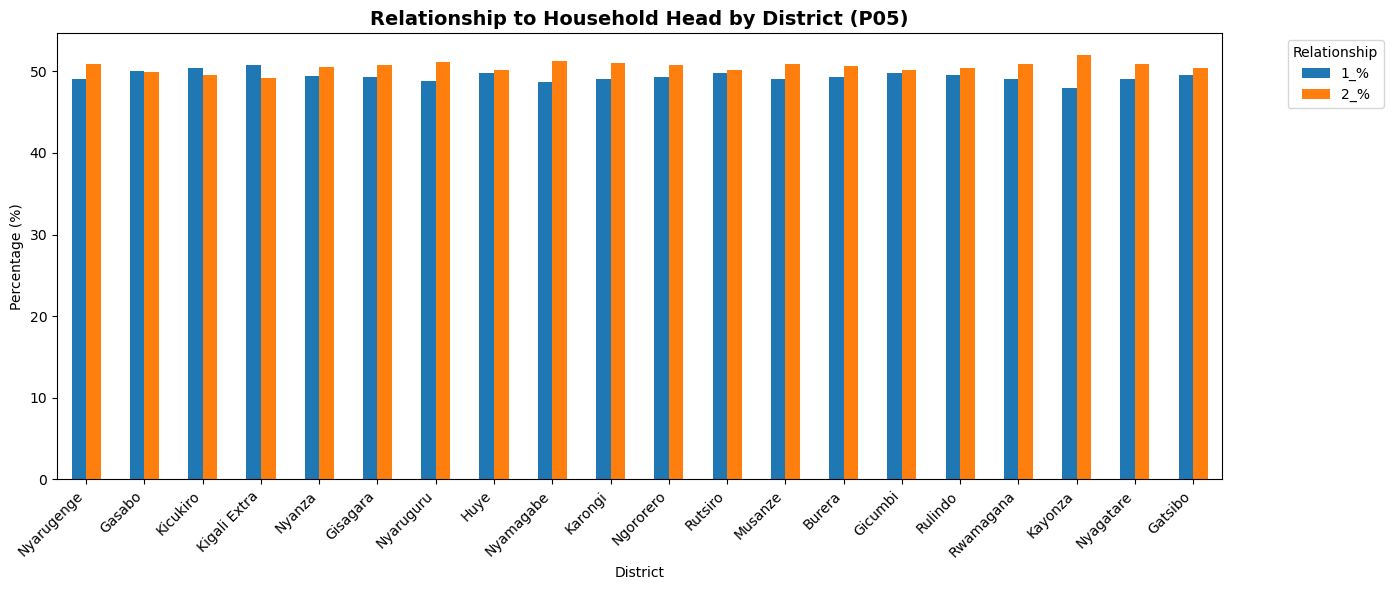

P05         District        1_%        2_%
reg_id                                    
11        Nyarugenge  49.059211  50.940100
12            Gasabo  50.051956  49.946842
13          Kicukiro  50.466697  49.530521
14      Kigali Extra  50.796506  49.199769
21            Nyanza  49.459396  50.538874
22          Gisagara  49.275369  50.721645
23         Nyaruguru  48.851253  51.147012
24              Huye  49.813329  50.180681
25         Nyamagabe  48.756604  51.240971
31           Karongi  49.013170  50.985139
32         Ngororero  49.257318  50.740508
33           Rutsiro  49.835791  50.162209
41           Musanze  49.072755  50.924556
42            Burera  49.325513  50.672829
43           Gicumbi  49.847690  50.145954
44           Rulindo  49.562380  50.429530
51         Rwamagana  49.049499  50.949111
52           Kayonza  47.941704  52.055524
53         Nyagatare  49.107411  50.889500
54           Gatsibo  49.610737  50.385653


In [13]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Define districts dictionary FIRST
districts = {11: "Nyarugenge", 12: "Gasabo", 13: "Kicukiro", 14: "Kigali Extra",
             21: "Nyanza", 22: "Gisagara", 23: "Nyaruguru", 24: "Huye", 25: "Nyamagabe",
             31: "Karongi", 32: "Ngororero", 33: "Rutsiro", 41: "Musanze", 42: "Burera",
             43: "Gicumbi", 44: "Rulindo", 51: "Rwamagana", 52: "Kayonza", 53: "Nyagatare", 54: "Gatsibo"}

# NOW calculate relationship to household head proportions
relationship_data = df.filter(col("P05").isNotNull() & col("reg_id").isNotNull() & col("reg_id").isin(list(districts.keys()))) \
    .groupBy("reg_id", "P05").count() \
    .toPandas()

# Pivot to get counts by relationship type
pivot = relationship_data.pivot(index='reg_id', columns='P05', values='count').fillna(0)

# Calculate percentages for each relationship type
for col_name in pivot.columns:
    pivot[f'{col_name}_%'] = (pivot[col_name] / pivot.sum(axis=1)) * 100

# Plot
percentage_cols = [c for c in pivot.columns if str(c).endswith('_%')]
plt.figure(figsize=(14, 6))
pivot['District'] = pivot.index.map(districts)
pivot.set_index('District')[percentage_cols].plot(kind='bar', stacked=False, figsize=(14, 6))
plt.title('Relationship to Household Head by District (P05)', fontsize=14, fontweight='bold')
plt.xlabel('District')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('relationship_by_district.png', dpi=300)
plt.show()

print(pivot[['District'] + percentage_cols])


### **Q4. Literacy rates by language**
- What percentage of people can read/write in local language, French, English, and other languages?

      Local     French    English     Other
0  69.09702  30.235823  10.497915  0.640656


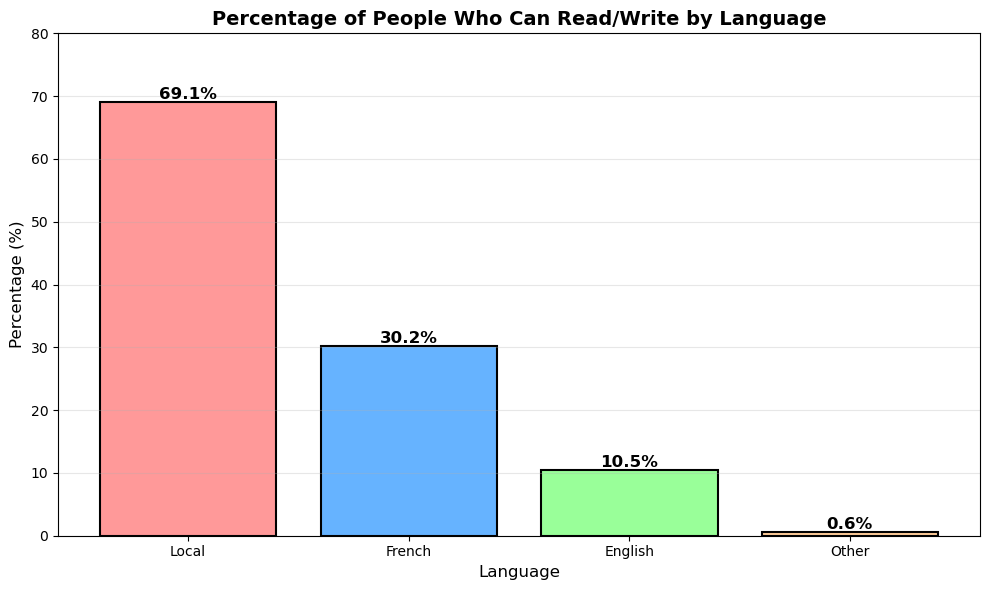

In [23]:
df_clean = df.withColumn("local", when((trim(col("lan_read_write_local")) == "") | col("lan_read_write_local").isNull(), None).when(col("lan_read_write_local") == 1, 1).otherwise(0)) \
            .withColumn("fr", when((trim(col("lan_read_write_fr")) == "") | col("lan_read_write_fr").isNull(), None).when(col("lan_read_write_fr") == 1, 1).otherwise(0)) \
            .withColumn("en", when((trim(col("lan_read_write_en")) == "") | col("lan_read_write_en").isNull(), None).when(col("lan_read_write_en") == 1, 1).otherwise(0)) \
            .withColumn("other", when((trim(col("lan_read_write_other")) == "") | col("lan_read_write_other").isNull(), None).when(col("lan_read_write_other") == 1, 1).otherwise(0))

result = df_clean.select(
    (sum(when(col("local") == 1, 1)) / sum(when(col("local").isNotNull(), 1)) * 100).alias("Local"),
    (sum(when(col("fr") == 1, 1)) / sum(when(col("fr").isNotNull(), 1)) * 100).alias("French"),
    (sum(when(col("en") == 1, 1)) / sum(when(col("en").isNotNull(), 1)) * 100).alias("English"),
    (sum(when(col("other") == 1, 1)) / sum(when(col("other").isNotNull(), 1)) * 100).alias("Other")
).toPandas()

print(result)

languages = result.columns.tolist()
percentages = result.values[0].tolist()

plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
bars = plt.bar(languages, percentages, color=colors, edgecolor='black', linewidth=1.5)

# Add percentage labels on bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Percentage of People Who Can Read/Write by Language', fontsize=14, fontweight='bold')
plt.xlabel('Language', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 80)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('language_literacy_bar.png', dpi=300)
plt.show()

### **Q5. Household size analysis**
- Compute the number of members per household (`hh_id`) and the average household size per province.

In [53]:
# Number of members per household (excluding province 6)
members_per_hh = df.filter(col("prov_id") != 6).groupBy("hh_id", "prov_id").agg(
    count("*").alias("household_size")
)

# Average household size per province (filtering again to be safe)
avg_hh_size = members_per_hh.filter(col("prov_id") != 6).groupBy("prov_id").agg(
    avg("household_size").alias("avg_household_size")
).orderBy("prov_id")

members_per_hh.show(5)
avg_hh_size.show()

+--------------------+-------+--------------+
|               hh_id|prov_id|household_size|
+--------------------+-------+--------------+
|11101101010021058...|      1|             3|
|11101101020011035...|      1|             7|
|11101101020011035...|      1|             4|
|11101101020011036...|      1|             4|
|11101101020011036...|      1|             4|
+--------------------+-------+--------------+
only showing top 5 rows


+-------+------------------+
|prov_id|avg_household_size|
+-------+------------------+
|      1| 4.236502607212589|
|      2| 4.820552220171989|
|      3|3.8960397630929706|
|      4| 4.110055815451571|
|      5| 4.336158270840883|
+-------+------------------+



### **Q6. Education level distribution**
- How many people attended each level of education (`P21`) per province?

<Figure size 1200x600 with 0 Axes>

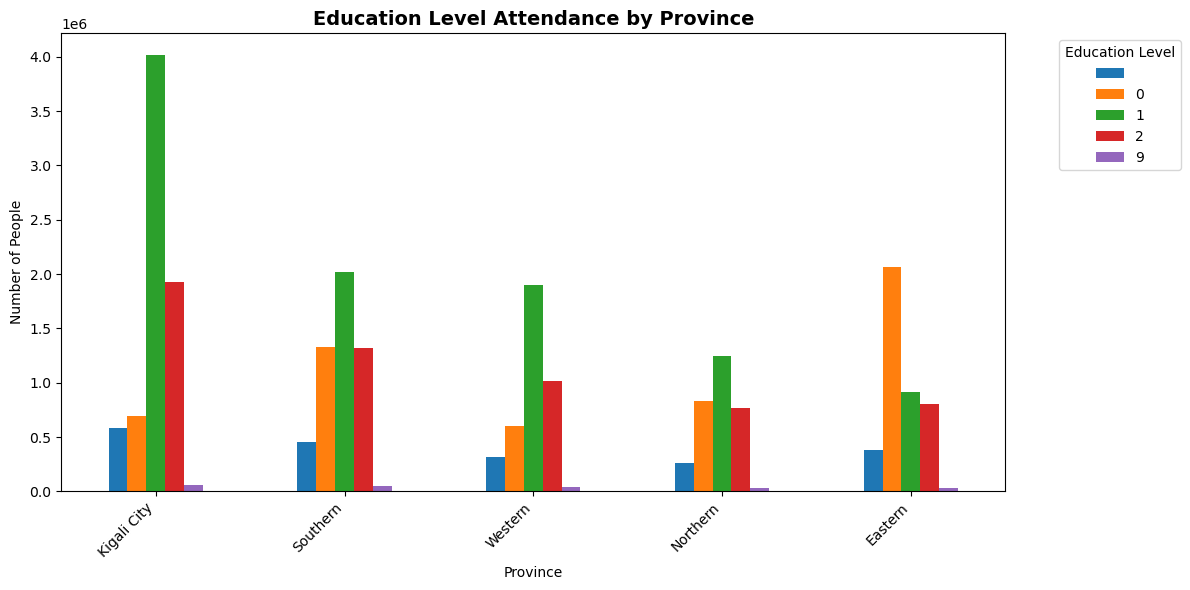


Education counts by province:
P21                    0        1        2      9     Province
prov_id                                                       
1        586853   689510  4015943  1926393  54427  Kigali City
2        457352  1327405  2021248  1318526  45545     Southern
3        318707   603235  1903852  1015751  36947      Western
4        261276   836068  1244528   763968  33285     Northern
5        384351  2069594   909965   804777  30956      Eastern


In [21]:




# Count people by education level and province
edu_data = df.filter(col("P21").isNotNull() & col("prov_id").isNotNull() & col("prov_id").isin([1, 2, 3, 4, 5])) \
    .groupBy("prov_id", "P21").count() \
    .toPandas()

# Pivot to get counts by education level
pivot = edu_data.pivot(index='prov_id', columns='P21', values='count').fillna(0)

# Remove NaN column if it exists
if 'nan' in pivot.columns:
    pivot = pivot.drop('nan', axis=1)
if float('nan') in pivot.columns:
    pivot = pivot.drop(float('nan'), axis=1)

# Province names
provinces = {1: "Kigali City", 2: "Southern", 3: "Western", 4: "Northern", 5: "Eastern"}
pivot['Province'] = pivot.index.map(provinces)

# Plot
plt.figure(figsize=(12, 6))
pivot.set_index('Province').plot(kind='bar', figsize=(12, 6))
plt.title('Education Level Attendance by Province', fontsize=14, fontweight='bold')
plt.xlabel('Province')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('education_by_province.png', dpi=300)
plt.show()

print("\nEducation counts by province:")
print(pivot)

### **Q7. Identify households with multilingual members**
- List households where at least one member speaks more than one language.

In [94]:
df_clean = df.withColumn("local_clean", when(col("lan_spoken_local") == " ", None).otherwise(col("lan_spoken_local"))) \
            .withColumn("fr_clean", when(col("lan_spoken_fr") == " ", None).otherwise(col("lan_spoken_fr"))) \
            .withColumn("en_clean", when(col("lan_spoken_en") == " ", None).otherwise(col("lan_spoken_en"))) \
            .withColumn("other_clean", when(col("lan_spoken_other") == " ", None).otherwise(col("lan_spoken_other")))

# Find households where at least one member speaks more than one language
result = df_clean.groupBy("hh_id").agg(
    sum(col("local_clean")).alias("speak_local"),
    sum(col("fr_clean")).alias("speak_french"),
    sum(col("en_clean")).alias("speak_english"),
    sum(col("other_clean")).alias("speak_other")
).filter(
    (col("speak_local") + col("speak_french") + col("speak_english") + col("speak_other")) >= 2
).select("hh_id")

result.show(5)

+--------------------+
|               hh_id|
+--------------------+
|11101101010011066...|
|11101101010021060...|
|11101101010031065...|
|11101101020011036...|
|11101101020011036...|
+--------------------+
only showing top 5 rows


### **Q8. Age vs. education correlation**
- Explore the correlation between age (`P08`) and highest level of education (`P21`).

In [95]:
df_clean = df.filter((col("P08") != " ") & (col("P21") != " "))

# Calculate correlation between age (P08) and education (P21)
correlation = df_clean.select(corr("P08", "P21")).first()[0]
print(f"Correlation between age and education: {correlation}")

Correlation between age and education: -0.22586720223464993


#### The correlation of -0.225867 between age and education indicates a weak negative relationship, suggesting that older individuals tend to have slightly lower education levels in this dataset.

### **Q9. Most common occupations per province**
- Find the top 5 occupations (`P29`) in each province.


In [57]:
result = df.filter(df.prov_id != 6).groupBy("prov_id", "P29").count() \
          .orderBy("prov_id", col("count").desc())

# Show top 5 for each province
result.show(5)

+-------+---+-------+
|prov_id|P29|  count|
+-------+---+-------+
|      1|   |4130140|
|      1| 20| 473557|
|      1| 18| 387230|
|      1| 19| 266870|
|      1| 22| 229332|
+-------+---+-------+
only showing top 5 rows


### **10. Data quality check**
- Identify columns with missing or null values.
- Compute the percentage of missing values per column.

In [97]:
total_rows = df.count()

# Create table with column names, missing counts and percentages
missing_data = []

for column in df.columns:
    null_count = df.where(df[column].isNull()).count()
    
    # Only check for empty spaces in string columns to avoid errors
    if dict(df.dtypes)[column] == "string":
        empty_count = df.where(df[column] == " ").count()
    else:
        empty_count = 0
        
    total_missing = null_count + empty_count
    missing_pct = (total_missing / total_rows) * 100
    missing_data.append((column, total_missing, missing_pct))

# Convert to DataFrame for nice table display
result_df = spark.createDataFrame(missing_data, ["column_name", "missing_count", "missing_percentage"])
result_df.show(len(missing_data))

25/11/21 16:00:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 
 Schema: _c0
Expected: _c0 but found: 
CSV file: file:///home/guest/Documents/Assignment2/Datasets/hh_data_ml.csv


+--------------------+-------------+--------------------+
|         column_name|missing_count|  missing_percentage|
+--------------------+-------------+--------------------+
|                 _c0|            0|                 0.0|
|             prov_id|            0|                 0.0|
|              reg_id|            0|                 0.0|
|             dist_id|            0|                 0.0|
|                adm4|            0|                 0.0|
|         urban_rural|            0|                 0.0|
|               hh_id|            0|                 0.0|
|                 P03|            0|                 0.0|
|                 P05|            0|                 0.0|
|                P07M|            0|                 0.0|
|                P07A|            0|                 0.0|
|                 P08|          881|0.003431460911181016|
|    lan_spoken_local|      2165987|   8.436435555761902|
|       lan_spoken_fr|      2166013|   8.436536824755876|
|       lan_sp

# **Part 2: Machine Learning**
## Music Genre classification

Have you ever wondered what makes us, humans, able to tell apart two songs of different genres? How we do we inherenly know the difference between a pop song and heavy metal? This type of classifcation may seem easy for us, but it's a very difficult challenge for a computer to do. So the question is, could an automatic genre classifcation model be possible?

We will be classifying songs based on a number of characteristics into a set of 23 electronic genres. This technology could be used by an application like Pandora to recommend songs to users or just create meaningful channels. Super fun!

### Dataset
*beatsdataset.csv*
Each row is an electronic music song. The dataset contains 100 song for each genre among 23 electronic music genres, they were the top (100) songs of their genres on November 2016. The 71 columns are audio features extracted of a two random minutes sample of the file audio. These features have been extracted using pyAudioAnalysis (https://github.com/tyiannak/pyAudioAnalysis).

### Your task
Use a classification algorithm that classifies songs into the 23 genres provided. Test out several different models and select the highest performing one. Also play around with feature selection methods and finally try to make a recommendation to a user.  

For the feature selection aspect of this project, you may need to get a bit creative if you want to select features from a non-tree algorithm. I did not go over this aspect of PySpark intentionally in the previous lectures to give you chance to get used to researching the PySpark documentation page. Here is the link to the Feature Selectors section of the documentation that just might come in handy: https://spark.apache.org/docs/latest/ml-features.html#feature-selectors


### Source
https://www.kaggle.com/caparrini/beatsdataset

In [26]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, sum
from pyspark.sql.functions import col
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics.pairwise import cosine_similarity
from pyspark.ml.feature import VectorSlicer
from pyspark.ml.feature import VarianceThresholdSelector

spark = SparkSession.builder \
    .appName("MusicGenreClassification") \
    .getOrCreate()


25/11/23 09:10:39 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


## Load and inspect the dataset

In [3]:
file_path ="Assignment2/Datasets/beatsdataset.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)


In [4]:
df.show(5)

25/11/23 04:12:24 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---+---------------+---------------+----------------+-------------------+-----------------+------------------+----------------+------------------+--------------+-------------+---------------+----------------+---------------+---------------+----------------+---------------+----------------+----------------+-----------------+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+---------------+---------------+-------------------+----------------------+--------------------+---------------------+------------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------------+-------------------+------

25/11/23 04:12:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 1-ZCRm, 2-Energym, 3-EnergyEntropym, 4-SpectralCentroidm, 5-SpectralSpreadm, 6-SpectralEntropym, 7-SpectralFluxm, 8-SpectralRolloffm, 9-MFCCs1m, 10-MFCCs2m, 11-MFCCs3m, 12-MFCCs4m, 13-MFCCs5m, 14-MFCCs6m, 15-MFCCs7m, 16-MFCCs8m, 17-MFCCs9m, 18-MFCCs10m, 19-MFCCs11m, 20-MFCCs12m, 21-MFCCs13m, 22-ChromaVector1m, 23-ChromaVector2m, 24-ChromaVector3m, 25-ChromaVector4m, 26-ChromaVector5m, 27-ChromaVector6m, 28-ChromaVector7m, 29-ChromaVector8m, 30-ChromaVector9m, 31-ChromaVector10m, 32-ChromaVector11m, 33-ChromaVector12m, 34-ChromaDeviationm, 35-ZCRstd, 36-Energystd, 37-EnergyEntropystd, 38-SpectralCentroidstd, 39-SpectralSpreadstd, 40-SpectralEntropystd, 41-SpectralFluxstd, 42-SpectralRolloffstd, 43-MFCCs1std, 44-MFCCs2std, 45-MFCCs3std, 46-MFCCs4std, 47-MFCCs5std, 48-MFCCs6std, 49-MFCCs7std, 50-MFCCs8std, 51-MFCCs9std, 52-MFCCs10std, 53-MFCCs11std, 54-MFCCs12std, 55-MFCCs13std, 56-ChromaVector1

In [46]:
# Shape
print("Number of rows:", df.count())
print("Number of columns:", len(df.columns))


Number of rows: 2300
Number of columns: 72


In [6]:
df.columns


['_c0',
 '1-ZCRm',
 '2-Energym',
 '3-EnergyEntropym',
 '4-SpectralCentroidm',
 '5-SpectralSpreadm',
 '6-SpectralEntropym',
 '7-SpectralFluxm',
 '8-SpectralRolloffm',
 '9-MFCCs1m',
 '10-MFCCs2m',
 '11-MFCCs3m',
 '12-MFCCs4m',
 '13-MFCCs5m',
 '14-MFCCs6m',
 '15-MFCCs7m',
 '16-MFCCs8m',
 '17-MFCCs9m',
 '18-MFCCs10m',
 '19-MFCCs11m',
 '20-MFCCs12m',
 '21-MFCCs13m',
 '22-ChromaVector1m',
 '23-ChromaVector2m',
 '24-ChromaVector3m',
 '25-ChromaVector4m',
 '26-ChromaVector5m',
 '27-ChromaVector6m',
 '28-ChromaVector7m',
 '29-ChromaVector8m',
 '30-ChromaVector9m',
 '31-ChromaVector10m',
 '32-ChromaVector11m',
 '33-ChromaVector12m',
 '34-ChromaDeviationm',
 '35-ZCRstd',
 '36-Energystd',
 '37-EnergyEntropystd',
 '38-SpectralCentroidstd',
 '39-SpectralSpreadstd',
 '40-SpectralEntropystd',
 '41-SpectralFluxstd',
 '42-SpectralRolloffstd',
 '43-MFCCs1std',
 '44-MFCCs2std',
 '45-MFCCs3std',
 '46-MFCCs4std',
 '47-MFCCs5std',
 '48-MFCCs6std',
 '49-MFCCs7std',
 '50-MFCCs8std',
 '51-MFCCs9std',
 '52-MFCCs

In [7]:
#data type
df.printSchema()


root
 |-- _c0: integer (nullable = true)
 |-- 1-ZCRm: double (nullable = true)
 |-- 2-Energym: double (nullable = true)
 |-- 3-EnergyEntropym: double (nullable = true)
 |-- 4-SpectralCentroidm: double (nullable = true)
 |-- 5-SpectralSpreadm: double (nullable = true)
 |-- 6-SpectralEntropym: double (nullable = true)
 |-- 7-SpectralFluxm: double (nullable = true)
 |-- 8-SpectralRolloffm: double (nullable = true)
 |-- 9-MFCCs1m: double (nullable = true)
 |-- 10-MFCCs2m: double (nullable = true)
 |-- 11-MFCCs3m: double (nullable = true)
 |-- 12-MFCCs4m: double (nullable = true)
 |-- 13-MFCCs5m: double (nullable = true)
 |-- 14-MFCCs6m: double (nullable = true)
 |-- 15-MFCCs7m: double (nullable = true)
 |-- 16-MFCCs8m: double (nullable = true)
 |-- 17-MFCCs9m: double (nullable = true)
 |-- 18-MFCCs10m: double (nullable = true)
 |-- 19-MFCCs11m: double (nullable = true)
 |-- 20-MFCCs12m: double (nullable = true)
 |-- 21-MFCCs13m: double (nullable = true)
 |-- 22-ChromaVector1m: double (null

In [8]:
#check for missing values


df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


25/11/23 04:12:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 1-ZCRm, 2-Energym, 3-EnergyEntropym, 4-SpectralCentroidm, 5-SpectralSpreadm, 6-SpectralEntropym, 7-SpectralFluxm, 8-SpectralRolloffm, 9-MFCCs1m, 10-MFCCs2m, 11-MFCCs3m, 12-MFCCs4m, 13-MFCCs5m, 14-MFCCs6m, 15-MFCCs7m, 16-MFCCs8m, 17-MFCCs9m, 18-MFCCs10m, 19-MFCCs11m, 20-MFCCs12m, 21-MFCCs13m, 22-ChromaVector1m, 23-ChromaVector2m, 24-ChromaVector3m, 25-ChromaVector4m, 26-ChromaVector5m, 27-ChromaVector6m, 28-ChromaVector7m, 29-ChromaVector8m, 30-ChromaVector9m, 31-ChromaVector10m, 32-ChromaVector11m, 33-ChromaVector12m, 34-ChromaDeviationm, 35-ZCRstd, 36-Energystd, 37-EnergyEntropystd, 38-SpectralCentroidstd, 39-SpectralSpreadstd, 40-SpectralEntropystd, 41-SpectralFluxstd, 42-SpectralRolloffstd, 43-MFCCs1std, 44-MFCCs2std, 45-MFCCs3std, 46-MFCCs4std, 47-MFCCs5std, 48-MFCCs6std, 49-MFCCs7std, 50-MFCCs8std, 51-MFCCs9std, 52-MFCCs10std, 53-MFCCs11std, 54-MFCCs12std, 55-MFCCs13std, 56-ChromaVector1

+---+------+---------+----------------+-------------------+-----------------+------------------+---------------+------------------+---------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+---------+------------+-------------------+----------------------+--------------------+---------------------+------------------+---------------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+-------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-

## Process the data by PySpark

In [48]:
df = df.drop("_c0") #remove ID column

In [49]:

# Cast all feature columns to numeric
df = df.select(
    *[col(c).cast("double").alias(c) for c in df.columns if c != "class"],
    col("class")
)


In [50]:
label_col = "class"
feature_cols = [c for c in df.columns if c != label_col]


In [51]:
# build StringIndexer
label_indexer = StringIndexer(
    inputCol=label_col,
    outputCol="label_index"
)

In [52]:
# Assemble features
assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features_raw"
)

In [53]:
df.columns

['1-ZCRm',
 '2-Energym',
 '3-EnergyEntropym',
 '4-SpectralCentroidm',
 '5-SpectralSpreadm',
 '6-SpectralEntropym',
 '7-SpectralFluxm',
 '8-SpectralRolloffm',
 '9-MFCCs1m',
 '10-MFCCs2m',
 '11-MFCCs3m',
 '12-MFCCs4m',
 '13-MFCCs5m',
 '14-MFCCs6m',
 '15-MFCCs7m',
 '16-MFCCs8m',
 '17-MFCCs9m',
 '18-MFCCs10m',
 '19-MFCCs11m',
 '20-MFCCs12m',
 '21-MFCCs13m',
 '22-ChromaVector1m',
 '23-ChromaVector2m',
 '24-ChromaVector3m',
 '25-ChromaVector4m',
 '26-ChromaVector5m',
 '27-ChromaVector6m',
 '28-ChromaVector7m',
 '29-ChromaVector8m',
 '30-ChromaVector9m',
 '31-ChromaVector10m',
 '32-ChromaVector11m',
 '33-ChromaVector12m',
 '34-ChromaDeviationm',
 '35-ZCRstd',
 '36-Energystd',
 '37-EnergyEntropystd',
 '38-SpectralCentroidstd',
 '39-SpectralSpreadstd',
 '40-SpectralEntropystd',
 '41-SpectralFluxstd',
 '42-SpectralRolloffstd',
 '43-MFCCs1std',
 '44-MFCCs2std',
 '45-MFCCs3std',
 '46-MFCCs4std',
 '47-MFCCs5std',
 '48-MFCCs6std',
 '49-MFCCs7std',
 '50-MFCCs8std',
 '51-MFCCs9std',
 '52-MFCCs10std',


In [79]:
scaler = StandardScaler(
    inputCol="features_raw",
    outputCol="features",
    withMean=True,
    withStd=True
)


In [80]:
# Build new pipeline
preprocess_pipeline = Pipeline(stages=[
    label_indexer,
    assembler,
    scaler
])

In [81]:
# Fit & Transform
processed_df = preprocess_pipeline.fit(df).transform(df)

In [82]:
# Create final dataset
final_df = processed_df.select("features", "label_index")

In [83]:
# Split
train_df, test_df = final_df.randomSplit([0.8, 0.2], seed=42)

## Train several models

In [84]:
train_df, test_df

(DataFrame[features: vector, label_index: double],
 DataFrame[features: vector, label_index: double])

### Initialize All Models

In [86]:
# Logistic Regression
lr = LogisticRegression(
    featuresCol="features",
    labelCol="label_index",
    maxIter=50
)


In [87]:
# Random Forest
rf = RandomForestClassifier(
    featuresCol="features",
    labelCol="label_index",
    numTrees=100
)


In [88]:
# Neural Network (MLP)
input_dim = train_df.first()["features"].size
layers = [input_dim, 128, 64, 23]


In [89]:
mlp = MultilayerPerceptronClassifier(
    featuresCol="features",
    labelCol="label_index",
    maxIter=100,
    layers=layers,
    blockSize=128,
    seed=123
)


In [90]:
# Function to Train + Evaluate a Model
def evaluate_model(model, train_df, test_df, name):
    print(f"\n🔵 Training {name}...")
    fitted = model.fit(train_df)
    predictions = fitted.transform(test_df)

    evaluator = MulticlassClassificationEvaluator(
        labelCol="label_index",
        predictionCol="prediction",
        metricName="accuracy"
    )
    
    accuracy = evaluator.evaluate(predictions)
    print(f"✔ {name} Accuracy: {accuracy:.4f}")
    return accuracy


In [91]:
# Train and Evaluate All Models
acc_lr = evaluate_model(lr, train_df, test_df, "Logistic Regression")
acc_rf = evaluate_model(rf, train_df, test_df, "Random Forest")
acc_mlp = evaluate_model(mlp, train_df, test_df, "Neural Network")




🔵 Training Logistic Regression...
✔ Logistic Regression Accuracy: 0.4293

🔵 Training Random Forest...


25/11/23 04:56:03 WARN DAGScheduler: Broadcasting large task binary with size 1359.7 KiB
25/11/23 04:56:04 WARN DAGScheduler: Broadcasting large task binary with size 1753.2 KiB


✔ Random Forest Accuracy: 0.4640

🔵 Training Neural Network...
✔ Neural Network Accuracy: 0.4218


In [92]:
print("\n===========================")
print(" MODEL COMPARISON RESULTS")
print("===========================")

print(f"Logistic Regression:     {acc_lr:.4f}")
print(f"Random Forest:           {acc_rf:.4f}")
print(f"Neural Network (MLP):    {acc_mlp:.4f}")



 MODEL COMPARISON RESULTS
Logistic Regression:     0.4293
Random Forest:           0.4640
Neural Network (MLP):    0.4218


## Feature Selection in PySpark

In [93]:
# Variance Threshold Selector

selector_var = VarianceThresholdSelector(
    varianceThreshold=0.0,
    featuresCol="features",
    outputCol="selectedFeatures"
)

var_model = selector_var.fit(train_df)

train_selected = var_model.transform(train_df)
test_selected = var_model.transform(test_df)

# Correct way
print("Selected feature count:", len(var_model.selectedFeatures))
print("Selected feature indices:", var_model.selectedFeatures)


Selected feature count: 71
Selected feature indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]


In [94]:
# Chi-Square Feature Selection
from pyspark.ml.feature import ChiSqSelector

selector_chi = ChiSqSelector(
    numTopFeatures=20,           # choose the top 20 features
    featuresCol="features",
    labelCol="label_index",
    outputCol="selectedFeatures"
)

chi_model = selector_chi.fit(train_df)
train_selected = chi_model.transform(train_df)
test_selected = chi_model.transform(test_df)

print("Top selected feature indices:", chi_model.selectedFeatures)


Top selected feature indices: [0, 8, 9, 11, 12, 15, 17, 20, 26, 27, 30, 31, 33, 43, 44, 60, 64, 66, 68, 70]


In [95]:
# RandomForest Feature Importance
rf_temp = RandomForestClassifier(
    labelCol="label_index",
    featuresCol="features",
    numTrees=50
)

rf_model = rf_temp.fit(train_df)

importances = rf_model.featureImportances

print("Feature Importances:", importances)


Feature Importances: (71,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70],[0.006488770377693945,0.031551108988778435,0.028143749931675437,0.016208750570314772,0.012214333328347994,0.020593053967837806,0.02508412823972895,0.010170201662065998,0.021998804791841253,0.02543019654472636,0.00567593011953529,0.003548419475153737,0.0015930102518095458,0.0029311547068432754,0.004439538845688819,0.0017139253832534767,0.0015075793904196064,0.0025281265921169647,0.002413921483919808,0.00106542403573807,0.00012948300891465957,0.003561337445936147,0.0011879205627037545,0.00761193512473828,0.002544712573668908,0.0027832721439066247,0.0023279556328980426,0.0034080680175532286,0.0015854330844723887,0.002139788534049832,0.003786004677799188,0.004063596921187642,0.0017794179775277575,0.00466229264543785,0.005006016381665677,0.007007101303874499,0.0060

In [96]:
# top k most important features
# Convert SparseVector importances to list
importance_list = importances.toArray().tolist()

# Pick top 30 features
top_k = 20
important_indices = sorted(
    range(len(importance_list)),
    key=lambda i: importance_list[i],
    reverse=True
)[:top_k]

important_indices


[70, 68, 42, 43, 38, 1, 69, 2, 37, 9, 47, 6, 53, 8, 40, 49, 54, 5, 51, 45]

In [97]:
# Use these selected indices
slicer = VectorSlicer(
    inputCol="features",
    outputCol="selectedFeatures",
    indices=important_indices
)

train_selected = slicer.transform(train_df)
test_selected = slicer.transform(test_df)

### After Feature Selection — Train Models Again

In [98]:
acc_lr_fs = evaluate_model(lr, train_selected, test_selected, "LR w/ feature selection")
acc_rf_fs = evaluate_model(rf, train_selected, test_selected, "RF w/ feature selection")
acc_mlp_fs = evaluate_model(mlp, train_selected, test_selected, "MLP w/ feature selection")



🔵 Training LR w/ feature selection...
✔ LR w/ feature selection Accuracy: 0.4293

🔵 Training RF w/ feature selection...


25/11/23 04:56:23 WARN DAGScheduler: Broadcasting large task binary with size 1359.6 KiB
25/11/23 04:56:24 WARN DAGScheduler: Broadcasting large task binary with size 1753.2 KiB


✔ RF w/ feature selection Accuracy: 0.4640

🔵 Training MLP w/ feature selection...
✔ MLP w/ feature selection Accuracy: 0.4218


## Build a Music Recommendation System

In [99]:
feature_col = "features"   # select features for recomandation

In [100]:
# Convert Spark Vector into dense numpy array
def vector_to_array(df, col="features"):
    return np.array([row[col].toArray() for row in df.collect()])


In [101]:
feature_matrix = vector_to_array(processed_df, "features")
genres = [row["class"] for row in processed_df.collect()]


In [102]:
# Cosine Similarity Function
similarity_matrix = cosine_similarity(feature_matrix)


In [103]:
# Function to Recommend Similar Songs
def recommend(song_index, k=5):
    scores = list(enumerate(similarity_matrix[song_index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    # Remove the song itself (similarity = 1.0)
    top = scores[1:k+1]

    print(f"\n🎵 Recommendations for song #{song_index}:")
    for idx, sim in top:
        print(f" → Song {idx} | Genre: {genres[idx]} | Similarity: {sim:.3f}")



In [104]:
# Test the Recommender
recommend(10, k=5)


🎵 Recommendations for song #10:
 → Song 28 | Genre: BigRoom | Similarity: 0.795
 → Song 1226 | Genre: HardDance | Similarity: 0.785
 → Song 2239 | Genre: Trance | Similarity: 0.776
 → Song 1258 | Genre: HardDance | Similarity: 0.767
 → Song 1259 | Genre: HardDance | Similarity: 0.764
